### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [148]:
import pandas as pd

uber_data = pd.read_csv(r'D:\Newton School\Database\uber\Uber Trips Analysis\data\uber-raw-data-aug14.csv')
df = uber_data
BaseMapper = {'B02512' : 'Unter', 'B02598' : 'Hinter', 'B02617' : 'Weiter', 'B02682' : 'Schmecken',
              'B02764' : 'Danach-NY'}
uber_data['Base_name'] = uber_data['Base'].map(BaseMapper)
uber_data


,Date/Time,Lat,Lon,Base,Base_name
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512,Unter
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512,Unter
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512,Unter
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512,Unter
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512,Unter
...,...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764,Danach-NY
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764,Danach-NY
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764,Danach-NY
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764,Danach-NY


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [3]:
# Convert the 'Date/Time' column to datetime format

import datetime
uber_data['date'] = pd.to_datetime(uber_data['Date/Time'])
uber_data['date'] = uber_data['date'].dt.date
# uber_data

# Group by date and count the number of pickups
group_dates = uber_data.groupby('date')['Base'].count().reset_index()

# Find the date with the highest number of pickups
high_pickup = uber_data.groupby('date')['Base'].count().reset_index().sort_values('Base', ascending = False).head(1)
d = high_pickup['date'].to_string(index=False)
print(f"highest pick up date is : {d}")


highest pick up date is : 2014-08-07


In [7]:
d = pd.to_datetime(d)
# date_series_formatted = d.dt.strftime('%d-%m-%Y')

# Print the formatted date
print(d)

2014-08-07 00:00:00


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [ ]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups

uber_data['date'] = pd.to_datetime(uber_data['date'])
uber_data['date'] = uber_data['date'].dt.date
date_with_highest_pickups = uber_data['date'].value_counts().idxmax()
# date_with_highest_pickups


# Get the count of pickups on the highest date
pickup_count_on_highest_date = len(uber_data[uber_data['date'] == date_with_highest_pickups])
pickup_count_on_highest_date


32759

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [ ]:
# Count the number of unique TLC base companies
unique_base_companies = uber_data['Base'].unique()
print(f"Unique TLC based companies {len(unique_base_companies)}")



Unique TLC based companies 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [ ]:
# Group by TLC base company and count the number of pickups

base_wise_count  = uber_data.groupby('Base')['date'].count().reset_index()

# Find the TLC base company with the highest number of pickups

max_count = base_wise_count['date'].max()
names_with_max_count = base_wise_count[base_wise_count['date'] == max_count]
names_list = names_with_max_count[['Base','date']]
TLC = names_list['Base'].to_string(index = False)
h_number = names_list['date'].to_string(index = False)
print(f"{TLC} company has the highest number of pickups with {h_number}")


Weiter company has the highest number of pickups with 355803


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [17]:
# Group by TLC base company and count the number of pickups

uber_data = pd.read_csv(r'D:\Newton School\Database\uber\Uber Trips Analysis\data\uber-raw-data-aug14.csv')
uber_data['date'] = pd.to_datetime(uber_data['Date/Time'])
uber_data['date'] = uber_data['date'].dt.date
BaseMapper = {'B02512' : 'Unter', 'B02598' : 'Hinter', 'B02617' : 'Weiter', 'B02682' : 'Schmecken',
              'B02764' : 'Danach-NY'}
Base_name = uber_data['Base'].map(BaseMapper)
uber_data['Base_name']= Base_name


base_wise_count  = uber_data.groupby('Base_name')['date'].count().sort_values(ascending= False).reset_index()
base_wise_count.rename(columns = {'date':'Pickup_count'}, inplace = True)
base_wise_count

,Base_name,Pickup_count
0,Weiter,355803
1,Hinter,220129
2,Schmecken,173280
3,Danach-NY,48591
4,Unter,31472


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [185]:
# Extract the hour from the 'Date/Time' column

df['date'] = pd.to_datetime(df['Date/Time']).dt.day
df['hour'] = pd.to_datetime(df['Date/Time']).dt.hour

grouped = df.groupby([df['date'], df['hour']])
g_result = grouped.size().reset_index(name='count')
print(g_result.groupby('date').apply(lambda x: x.loc[x['count'].idxmax()]).reset_index(drop=True))







    date  hour  count
0      1    22   2247
1      2    22   2096
2      3    16   1574
3      4    17   1885
4      5    17   2205
5      6    17   2365
6      7    18   2429
7      8    17   2015
8      9    22   1957
9     10    17   1369
10    11    17   1627
11    12    18   2831
12    13    17   2164
13    14    18   2190
14    15    18   1939
15    16    22   1917
16    17    17   1346
17    18    17   1536
18    19    17   1882
19    20    17   2085
20    21    22   2547
21    22    16   1925
22    23    19   1971
23    24    17   1403
24    25    17   1460
25    26    17   1778
26    27    17   1906
27    28    19   1958
28    29    15   1682
29    30    22   1584
30    31    16   1778


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

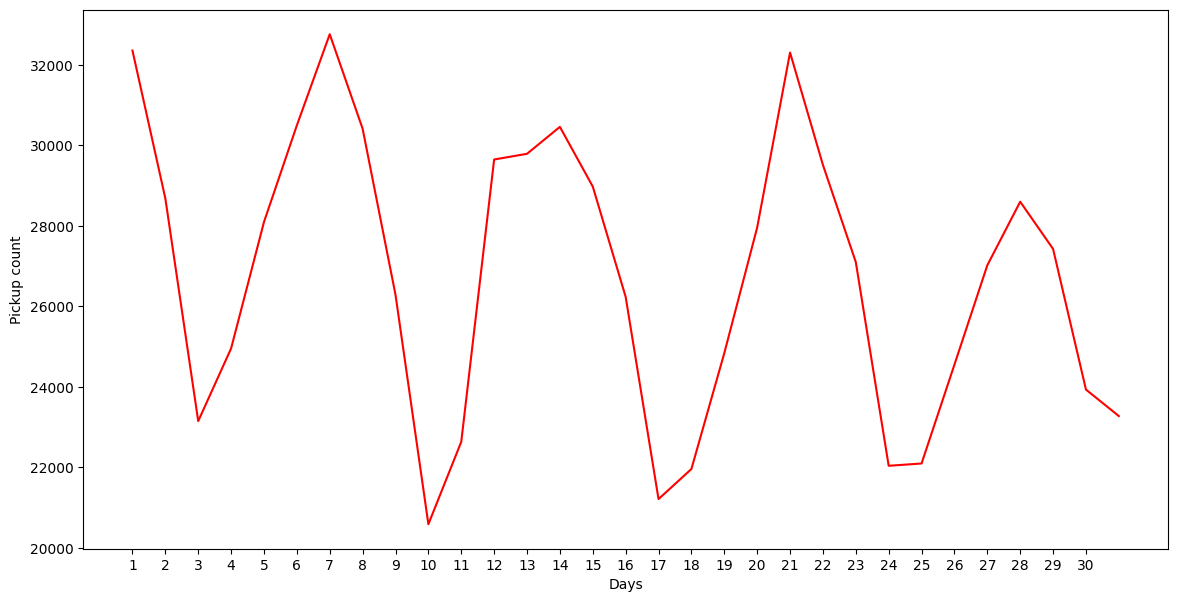

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Group by date and count the number of pickups

groupby_dates = uber_data.groupby('date')['Base'].count().reset_index()
groupby_dates

# Create a line plot to visualize the number of pickups over time

groupby_dates['date'] = pd.to_datetime(groupby_dates['date'])
groupby_dates['date'] = groupby_dates['date'].dt.day
plt.figure(figsize=(14,7))
x = np.array(groupby_dates['date'])
y= np.array(groupby_dates['Base'])
plt.plot(x, y, color='red')
plt.xticks(np.arange(1, 31, 1))
plt.xlabel('Days')
plt.ylabel('Pickup count')
plt.show()

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

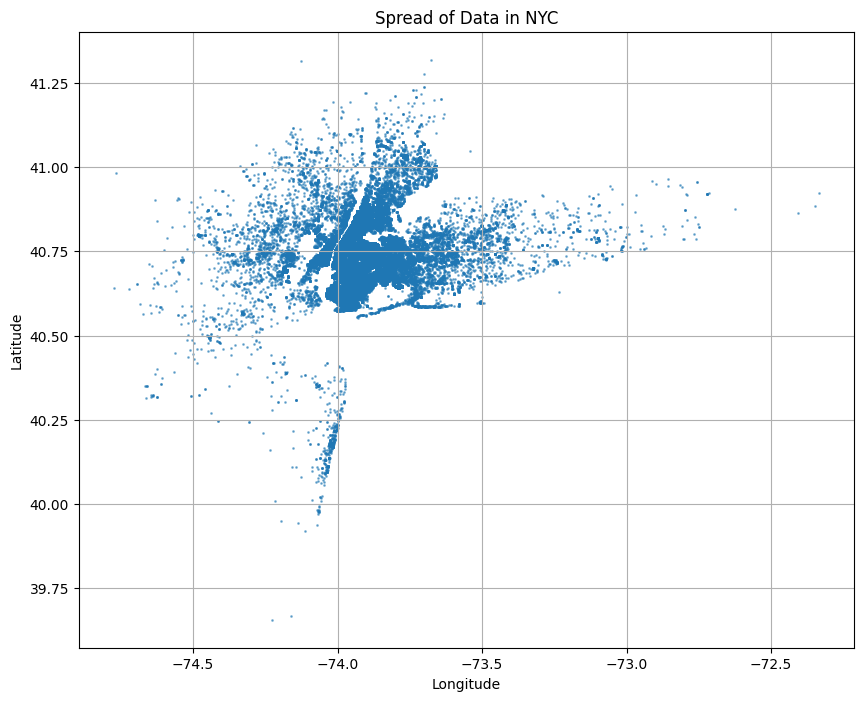

In [ ]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude

import folium
from folium.plugins import MarkerCluster
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
marker_cluster = MarkerCluster().add_to(m)
plt.figure(figsize=(10, 8))
plt.scatter(uber_data['Lon'], uber_data['Lat'], s=1, alpha=0.5)
plt.title('Spread of Data in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)


#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

Text(0.5, 1.0, 'Bar Chart ')

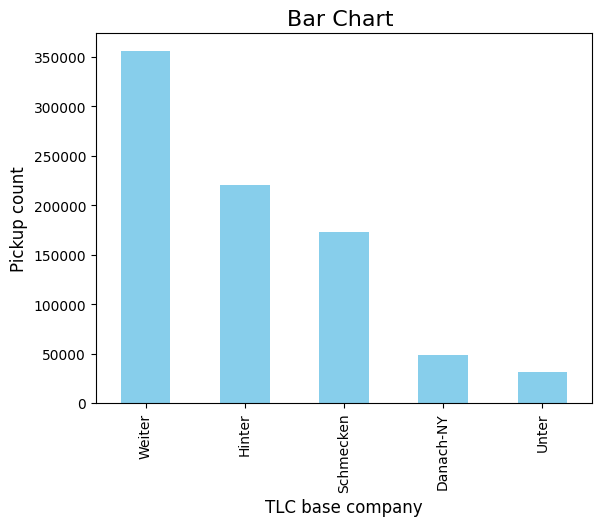

In [34]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
base_wise_count['Base_name'] = base_wise_count['Base_name'].to_list()
base_wise_count['Pickup_count'] = base_wise_count['Pickup_count'].to_list()

import matplotlib.pyplot as plt

base_wise_count.plot(x='Base_name', y='Pickup_count', kind='bar', color='skyblue',  title='Bar Chart Example', legend=False)
plt.xlabel('TLC base company', fontsize=12)
plt.ylabel('Pickup count', fontsize=12)
plt.title('Bar Chart ', fontsize=16)
# base_wise_count

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

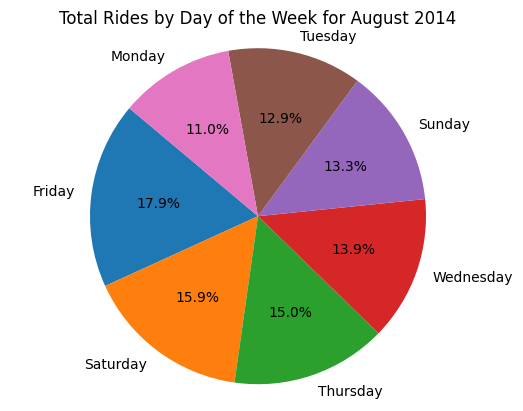

In [135]:
# Group by day of the week and count the number of pickups

uber_data = pd.read_csv(r'D:\Newton School\Database\uber\Uber Trips Analysis\data\uber-raw-data-aug14.csv')
uber_data['date'] = pd.to_datetime(uber_data['Date/Time'])
# uber_data['date'] = uber_data['date'].dt.date
DayMap={0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}
df=uber_data

df["WeekDay"]=df["date"].dt.weekday.map(DayMap)

Daywise = df.groupby('WeekDay')['Base'].count().sort_values(ascending= False).reset_index()
Daywise['WeekDay'] = Daywise['WeekDay'].to_list()
Daywise['Base'] = Daywise['Base'].to_list()

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week

import matplotlib.pyplot as plt
plt.pie(Daywise['Base'], labels=Daywise['WeekDay'] , autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total Rides by Day of the Week for August 2014')
plt.show()
